In [1]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.ticker import LinearLocator, FormatStrFormatter 
import numpy as np 
from random import random, seed
import functions as fx
import sklearn.model_selection as sklm

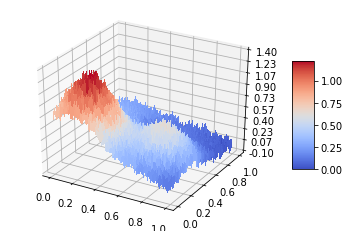

In [4]:
fig         = plt.figure() 
ax          = fig.gca(projection='3d')
n_x         = 200

# Make data. 
x           = np.sort(np.random.uniform(0, 1, n_x))
y           = np.sort(np.random.uniform(0, 1, n_x))

x, y        = np.meshgrid(x,y)
noise_level = 0.05


frank       = fx.FrankeFunction(x, y, noise_level)


# Plot the surface. 
surf        = ax.plot_surface(x, y, frank, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis. 
ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


## oppgave 1 
standard ols.
confidence intervals for beta by computing their variances.
evaluate MSE and R2.

In [32]:


x           = np.sort(np.random.uniform(0, 1, n_x))
y           = np.sort(np.random.uniform(0, 1, n_x))


maxpower = 5
beta_result = np.array([])
pred_result = np.array([])

mse_ols=np.empty([maxpower])
r2_ols=np.empty([maxpower])

for i in range(maxpower):

    design      = fx.DesignDesign(x,y,i+1)
    beta_ols, frank_pred_ols  = fx.OridinaryLeastSquares(design,np.ravel(frank),design)
    beta_result = np.append(beta_result,beta_ols,axis=0)
    pred_result = np.append(pred_result,frank_pred_ols, axis=0)
    
    mse_ols[i] = fx.MSE(np.ravel(frank),frank_pred_ols)
    r2_ols[i] = fx.R2Score(np.ravel(frank),frank_pred_ols)



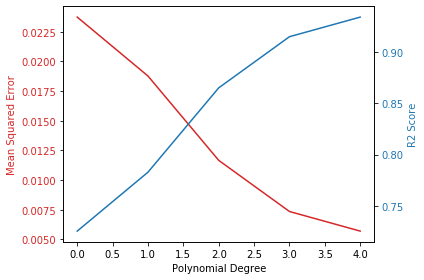

In [33]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('Mean Squared Error', color=color)
ax1.plot(range(maxpower), mse_ols, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(range(maxpower), r2_ols, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()